<a href="https://colab.research.google.com/github/BladimirBL/Talento-Tech/blob/main/New_Notebook_Data_Cleaning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# Importar Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Lectura
from google.colab import drive
drive.mount('/content/drive')

ruta = ('/content/drive/MyDrive/dataset_banco-1.csv')
data = pd.read_csv(ruta)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
print(data.shape)
data.head(10)

(45215, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no
5,35,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139.0,1,-1.0,0,unknown,no
6,28,Management,single,tertiary,no,447.0,yes,yes,unknown,5,may,217.0,1,-1.0,0,unknown,no
7,42,entrepreneur,div.,tertiary,yes,2.0,yes,no,unknown,5,may,380.0,1,-1.0,0,unknown,no
8,58,retired,married,primary,no,121.0,yes,no,unknown,5,may,50.0,1,-1.0,0,unknown,no
9,43,technician,single,secondary,no,593.0,yes,No,unknown,5,may,55.0,1,-1.0,0,unknown,no


In [35]:
# Veamos las variaables categoricas numericas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


In [36]:
# Esto es para eliminar filsa correspondientes
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


In [37]:
# Conteo de los niveles en las diferentes columnas categoricas
cols_cat = ['job','marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

for col in cols_cat:
  print(f'columna {col}: {data[col].nunique()} subniveles')

columna job: 18 subniveles
columna marital: 6 subniveles
columna education: 10 subniveles
columna default: 2 subniveles
columna housing: 2 subniveles
columna loan: 6 subniveles
columna contact: 5 subniveles
columna month: 12 subniveles
columna poutcome: 6 subniveles
columna y: 2 subniveles


In [38]:
# En agradecimientos a Lala♥
colscat = ['job', 'marital', 'education', 'default', 'housing',
           'loan', 'contact', 'month', 'poutcome', 'y']
for col in colscat:
  print('Columna', col, {data[col].nunique()}, 'subniveles')


Columna job {18} subniveles
Columna marital {6} subniveles
Columna education {10} subniveles
Columna default {2} subniveles
Columna housing {2} subniveles
Columna loan {6} subniveles
Columna contact {5} subniveles
Columna month {12} subniveles
Columna poutcome {6} subniveles
Columna y {2} subniveles


In [39]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [40]:
# Contelos de valores con  -1
Count = data['pdays'].value_counts()[-1]

print(Count)

36953


In [41]:
# Calcule la media del atributo "pdays: dias de contacto al usuario antes de la campana actual"   Media = promedio   la media do el promedio de pdays
media = data['pdays']. mean()
print ('Promedio de dias de contacto:', media)

Promedio de dias de contacto: 40.17822461123277


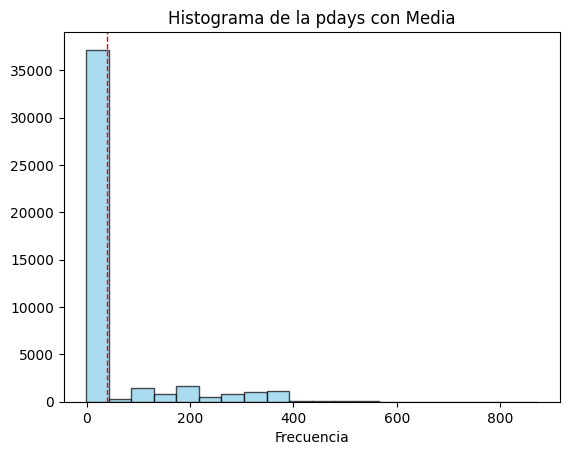

In [42]:
# Graficar un histograma del atributo "pdays"
plt.hist(data['pdays'], bins=20, color ='skyblue', edgecolor='black', alpha=0.7)

# Agregar una linea vertical para mostrar la media
plt.axvline(media, color='red', linestyle='dashed', linewidth=1)

# Etiquetas y titulo
plt.xlabel('Valor de la pdays')
plt.xlabel('Frecuencia')
plt.title('Histograma de la pdays con Media')

# Mostrar la grafica
plt.show()


In [43]:
# Calcule la desviacion estandar del atrivuto campaña
desviacion_estandar = data['pdays'].std()

print('Desviacion estandar de la pdays:', desviacion_estandar)

Desviacion estandar de la pdays: 100.10328306134589


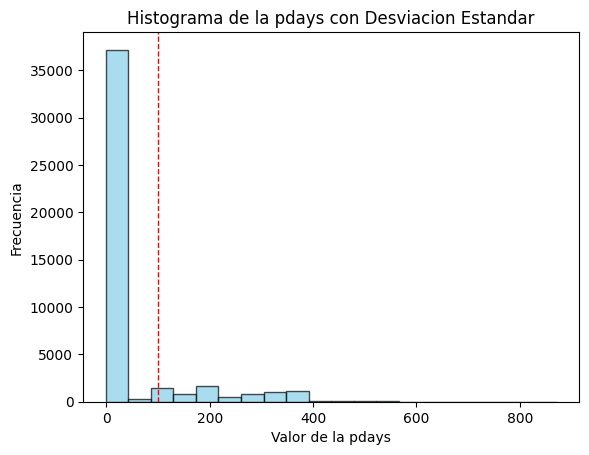

In [44]:
# Graficar un histograma del atributo "campana"
plt.hist(data['pdays'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Agregar una linea vertical para mostrar la desviacion estandar
plt.axvline(desviacion_estandar, color='red', linestyle='dashed', linewidth=1)

# Etiqueta y titulo
plt.xlabel('Valor de la pdays')
plt.ylabel('Frecuencia')
plt.title('Histograma de la pdays con Desviacion Estandar')

# Mostraar la grafica.
plt.show()

In [45]:
# Mostramos la cantidad de registros antes de aplicar una transformacion, limpieza o filtro
print(f'Tamano del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
# Mostramos la cantidad de registros despues de aplicar una transformacion, limpieza o filtro
print(f'Tamano del set despues de eliminar las filas repetidas: {data.shape}')

Tamano del set antes de eliminar las filas repetidas: (45207, 17)
Tamano del set despues de eliminar las filas repetidas: (45203, 17)


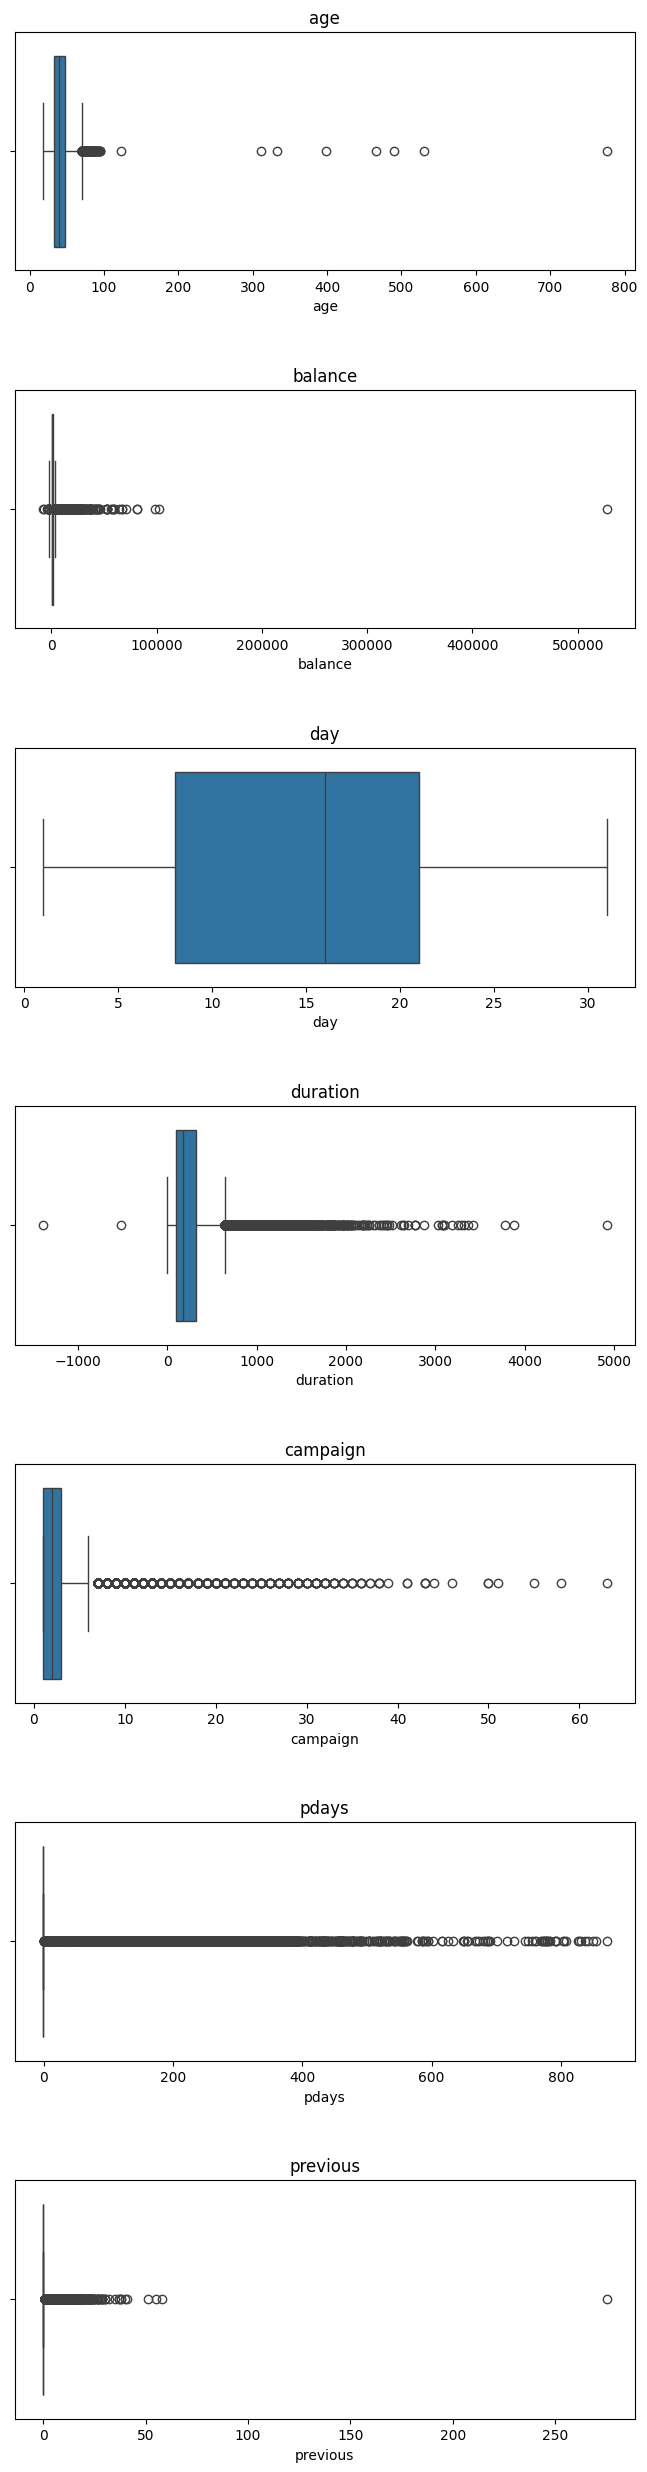

In [46]:
# Generar graficas individualespues las variables numericas estan en rangos diferentes

cols_num = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8,31))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
  sns.boxplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)



In [47]:
# Eliminar filas con  con 'age'>100
print(f'tamano del sen antes de eliminar registros de edada: {data.shape}')
data = data.drop(data[data['age'] > 100].index)
print(f'tamano del set despues de eliminar registros de edada: {data.shape}')

tamano del sen antes de eliminar registros de edada: (45203, 17)
tamano del set despues de eliminar registros de edada: (45195, 17)
